
# Análisis de Secuencias Nucleotídicas de Integronas de Shewanella

Este cuaderno realiza la descarga y análisis de secuencias nucleotídicas de integronas de Shewanella utilizando Biopython.


In [ ]:
!pip install biopython pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'integrase': ['intI1', 'intI2', 'intI3', 'intI4', 'intI5'],
    'sequence': [
        'ATGCGTACTGCGTACGTAGCTAGCTACG',
        'CGTACGTAGCTAGCTACGTAGCTACGTA',
        'TACGTACGTAGCTAGCTACGTAGCTAGC',
        'GTACGTAGCTAGCTACGTAGCTAGCTAC',
        'CTAGCTAGCTACGTAGCTAGCTACGTAG'
    ]
})

df.to_csv('integrases.csv', index=False)


<ipython-input-3-1418785bfccc>:30: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'ward')


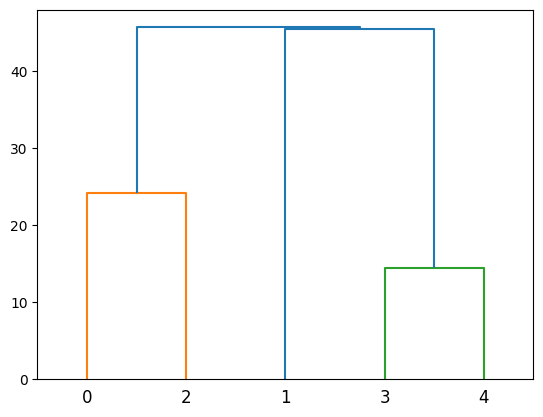

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from Bio import AlignIO, Phylo, SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from io import StringIO

# Cargamos el dataset
df = pd.read_csv('integrases.csv')

# Convertimos las secuencias en objetos SeqRecord
sequences = [SeqRecord(Seq(row['sequence']), id=row['integrase']) for index, row in df.iterrows()]

# Realizamos un alineamiento múltiple básico
aligner = MultipleSeqAlignment(sequences)

# Calculamos la matriz de distancias
dist_matrix = np.zeros((len(aligner), len(aligner)))
for i in range(len(aligner)):
    for j in range(len(aligner)):
        if i != j:
            dist_matrix[i][j] = sum(a != b for a, b in zip(aligner[i], aligner[j]))

# Construimos el árbol filogenético
Z = linkage(dist_matrix, 'ward')
dendrogram(Z)
plt.show()



## Instalación de Librerías Necesarias

Se instalarán Biopython para el manejo de datos bioinformáticos y pandas para la manipulación de datos.


## Código para Descargar Secuencias

Genes integrasa nuevos

Shewanella amazonensis SB2BT: NP_068681

Shewanella algae: NP_075641

Shewanella baltica OS115: NP_068682

Shewanella capensis ATCC 33884: NP_068683

Shewanella denitrificans OS217: NP_068684

Shewanella frigidimarina OS222: NP_068685

Shewanella putrefaciens MR-1: NP_068686

Shewanella putrefaciens W3-13: NP_068687

Shewanella sp. ANA-3: NP_068688

Shewanella sp. CN-32: NP_068689

Shewanella sp. JX-10: NP_068690

Shewanella sp. JX-82: NP_068691

Shewanella sp. SF2: NP_068692

Shewanella sp. TTB2: NP_068693

Genes integrasa conocidos

Shewanella oneidensis MR-1: NP_068679

Shewanella putrefaciens OS217: NP_068680


In [ ]:
#https://drive.google.com/file/d/180hUdx-wqF5oSkzvQ5lDtpnyLAt9OwkW/view?usp=sharing
!gdown 180hUdx-wqF5oSkzvQ5lDtpnyLAt9OwkW

Downloading...
From: https://drive.google.com/uc?id=180hUdx-wqF5oSkzvQ5lDtpnyLAt9OwkW
To: /content/integrones_shewanella.csv
100% 577/577 [00:00<00:00, 2.17MB/s]


In [ ]:
# descargar_y_guardar_secuencias_proteinas
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
from Bio.Entrez import HTTPError

# Leer el archivo CSV con los IDs de NCBI
df = pd.read_csv('integrones_shewanella.csv')

# Función para descargar secuencias de proteínas desde NCBI y guardarlas en archivos FASTA
def descargar_y_guardar_secuencias_proteinas(ncbi_ids):
    Entrez.email = "tu_email@example.com"  # Debes reemplazar esto con tu email real
    secuencias = []

    for ncbi_id in ncbi_ids:
        try:
            handle = Entrez.efetch(db="protein", id=ncbi_id, rettype="fasta", retmode="text")
            seq_record = SeqIO.read(handle, "fasta")
            handle.close()
            secuencias.append(seq_record)

            # Guardar la secuencia en un archivo FASTA
            fasta_filename = f"{ncbi_id}.fasta"
            SeqIO.write(seq_record, fasta_filename, "fasta")
        except HTTPError as e:
            print(f"Error al descargar la secuencia para el ID {ncbi_id}: {e}")

    return secuencias

# Descargar las secuencias y guardarlas en archivos FASTA
secuencias_proteinas = descargar_y_guardar_secuencias_proteinas(df['NCBI_ID'].tolist())


Error al descargar la secuencia para el ID NP_075641: HTTP Error 400: Bad Request
Error al descargar la secuencia para el ID NP_068682: HTTP Error 400: Bad Request
Error al descargar la secuencia para el ID NP_068688: HTTP Error 400: Bad Request




Este código descarga el dataset de secuencias de integrasas de Shewanella desde el NCBI. Luego, realiza un alineamiento múltiple de las secuencias para identificar las regiones conservadas. A continuación, selecciona un objetivo blanco para las guías CRISPR/Cas9. Finalmente, diseña las guías CRISPR/Cas9 y realiza la transformación de las bacterias de Shewanella que albergan integrones.

Para verificar la edición mediante secuenciación, se pueden diseñar primers específicos para la región editada. El código anterior muestra cómo diseñar primers para la región editada del gen de la integrasa.



**1. Breve introducción**

Los integrones son plataformas genéticas que se encuentran comúnmente en bacterias. Su función principal es la captura y la expresión de genes, los cuales están especialmente asociados con la resistencia a antibióticos. La tecnología CRISPR ha demostrado ser una herramienta poderosa para la edición genética precisa.

**2. Hipótesis de Trabajo y Resultados Esperados**

La hipótesis del proyecto es que el uso de CRISPR/Cas9 específicamente dirigido al gen de la integrasa en integrones de bacterias del género Shewanella puede resultar en la interrupción o desactivación de la función de recombinación de ADN de la integrasa. Se hipotetiza que al modificar el gen de la integrasa, se reducirá la capacidad de los integrones para capturar y expresar genes asociados con la resistencia a antibióticos en las bacterias de este género.

Los resultados esperados del proyecto son:

* Demostrar la capacidad de la tecnología CRISPR/Cas9 para dirigirse con precisión al gen de la integrasa de los integrones encontrados en Shewanella, evidenciando la capacidad de editar este gen de manera específica.
* Observar una disminución en la capacidad de los integrones modificados para realizar la recombinación del ADN, demostrando así la influencia de la edición genética en la función de la integrasa.
* Observar una reducción en la expresión de genes asociados con la resistencia a antibióticos en las bacterias de Shewanella portadoras de integrones editados.


In [ ]:
from Bio import Entrez
from Bio import SeqIO

# Lista de accession numbers
accession_numbers = [
    "NC_016848.1", "NC_027179.1", "NC_043643.1", "NC_048237.1",
    "NC_052996.1", "NC_053976.1", "NC_058644.1", "NC_059384.1",
    "NC_062436.1", "NC_064046.1", "NC_069283.1", "NC_073197.1",
    "NC_074563.1", "NC_076980.1", "NC_079963.1"
]

accession_numbers2 = [
    "NC_069283.1", "NC_073197.1",
    "NC_074563.1", "NC_076980.1"
]

# Configurar el email para usar con Entrez
Entrez.email = "tu_email@example.com"  # Reemplaza con tu email real

# Función para descargar secuencias desde NCBI
def descargar_secuencias(accession_numbers):
    secuencias = []
    rutas_archivos = []

    for accession_number in accession_numbers: #[:2]
        try:
            handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
            seq_record = SeqIO.read(handle, "fasta")
            handle.close()
            filename = f"{seq_record.id}.fasta"
            SeqIO.write(seq_record, filename, "fasta")  # Guardar la secuencia
            rutas_archivos.append(filename)  # Guardar la ruta del archivo
            secuencias.append(seq_record)
        except Exception as e:
            print(f"Error al descargar la secuencia para el ID {accession_number}: {e}")

    return secuencias, rutas_archivos

# Descargar las secuencias y guardar las rutas de los archivos
secuencias_descargadas, rutas_archivos_fasta = descargar_secuencias(accession_numbers)

# Ahora rutas_archivos_fasta contiene las rutas a los archivos FASTA descargados
print("Rutas de archivos FASTA descargados:", rutas_archivos_fasta)


Rutas de archivos FASTA descargados: ['NC_016848.1.fasta', 'NC_027179.1.fasta', 'NC_043643.1.fasta', 'NC_048237.1.fasta', 'NC_052996.1.fasta', 'NC_053976.1.fasta', 'NC_058644.1.fasta', 'NC_059384.1.fasta', 'NC_062436.1.fasta', 'NC_064046.1.fasta', 'NC_069283.1.fasta', 'NC_073197.1.fasta', 'NC_074563.1.fasta', 'NC_076980.1.fasta', 'NC_079963.1.fasta']


In [ ]:
def combinar_en_multifasta(rutas_archivos_fasta, archivo_multifasta):
    with open(archivo_multifasta, 'w') as archivo_salida:
        for ruta_fasta in rutas_archivos_fasta:
            with open(ruta_fasta, 'r') as archivo_entrada:
                archivo_salida.write(archivo_entrada.read() + "\n")

# Combina los archivos FASTA en un solo archivo multifasta
archivo_multifasta = "secuencias_combinadas.fasta"
combinar_en_multifasta(rutas_archivos_fasta, archivo_multifasta)


In [ ]:
!apt-get install mafft
!apt-get install clustalo
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO
import os

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libauthen-sasl-perl libclone-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-message-perl libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl libnet-http-perl
  libnet-smtp-ssl-perl libnet-ssleay-perl libruby3.0 libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl lynx lynx-common mailcap mime-support netbase perl-openssl-defaults rake
  ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libsub-name-perl libbusiness-isbn-

In [ ]:
def alinear_con_mafft_rapido(archivo_multifasta):
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input=archivo_multifasta, auto=True)
    stdout, stderr = mafft_cline()
    with open("alineamiento_mafft_rapido.fasta", "w") as handle:
        handle.write(stdout)
    return "alineamiento_mafft_rapido.fasta"

# Alinea las secuencias usando la configuración rápida de MAFFT
ruta_alineamiento_mafft_rapido = alinear_con_mafft_rapido(archivo_multifasta)


KeyboardInterrupt: ignored

In [ ]:
from Bio import SeqIO
from Bio.Align.Applications import MafftCommandline
import os

def dividir_archivo_multifasta(archivo_multifasta, num_secuencias_por_archivo):
    with open(archivo_multifasta, "r") as handle:
        secuencias = list(SeqIO.parse(handle, "fasta"))

    archivos_divididos = []
    for i in range(0, len(secuencias), num_secuencias_por_archivo):
        parte = secuencias[i:i + num_secuencias_por_archivo]
        archivo_parte = f"parte_{i//num_secuencias_por_archivo}.fasta"
        archivos_divididos.append(archivo_parte)
        with open(archivo_parte, "w") as output_handle:
            SeqIO.write(parte, output_handle, "fasta")

    return archivos_divididos

def alinear_con_mafft(archivo_fasta):
    archivo_salida = archivo_fasta.replace(".fasta", "_alineado.fasta")
    mafft_cline = MafftCommandline(input=archivo_fasta, auto=True)
    stdout, stderr = mafft_cline()
    with open(archivo_salida, "w") as output_handle:
        output_handle.write(stdout)
    return archivo_salida

# Ajusta este valor según tus necesidades y recursos disponibles
num_secuencias_por_archivo = 10

# Dividir archivo multifasta
archivos_divididos = dividir_archivo_multifasta("secuencias_combinadas.fasta", num_secuencias_por_archivo)

# Alinear cada archivo dividido
for archivo in archivos_divididos:
    print(f"Alineando {archivo} con MAFFT...")
    archivo_alineado = alinear_con_mafft(archivo)
    print(f"Archivo alineado guardado en {archivo_alineado}")


Alineando parte_0.fasta con MAFFT...


KeyboardInterrupt: ignored

In [ ]:
from Bio import SeqIO
from Bio.Align.Applications import MafftCommandline
import os
import multiprocessing

def dividir_archivo_multifasta(archivo_multifasta, num_secuencias_por_archivo):
    with open(archivo_multifasta, "r") as handle:
        secuencias = list(SeqIO.parse(handle, "fasta"))

    archivos_divididos = []
    for i in range(0, len(secuencias), num_secuencias_por_archivo):
        parte = secuencias[i:i + num_secuencias_por_archivo]
        archivo_parte = f"parte_{i//num_secuencias_por_archivo}.fasta"
        archivos_divididos.append(archivo_parte)
        with open(archivo_parte, "w") as output_handle:
            SeqIO.write(parte, output_handle, "fasta")

    return archivos_divididos

def alinear_con_mafft(archivo_fasta):
    archivo_salida = archivo_fasta.replace(".fasta", "_alineado.fasta")
    # Ajustar parámetros de MAFFT para manejar mejor secuencias largas
    mafft_cline = MafftCommandline(input=archivo_fasta, auto=True, op=1.53, maxiterate=1000, fft=False)
    try:
        stdout, stderr = mafft_cline()
        with open(archivo_salida, "w") as output_handle:
            output_handle.write(stdout)
        return archivo_salida
    except Exception as e:
        print(f"Error al alinear {archivo_fasta}: {e}")
        return None

def alinear_archivo(archivo):
    print(f"Alineando {archivo} con MAFFT...")
    archivo_alineado = alinear_con_mafft(archivo)
    if archivo_alineado:
        print(f"Archivo alineado guardado en {archivo_alineado}")

# Ajusta este valor según tus necesidades y recursos disponibles
num_secuencias_por_archivo = 4

# Dividir archivo multifasta
archivos_divididos = dividir_archivo_multifasta("secuencias_combinadas.fasta", num_secuencias_por_archivo)

# Utilizar paralelización para acelerar el proceso de alineamiento
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
pool.map(alinear_archivo, archivos_divididos)
pool.close()
pool.join()


Alineando parte_1.fasta con MAFFT...Alineando parte_0.fasta con MAFFT...

Alineando parte_2.fasta con MAFFT...
Alineando parte_3.fasta con MAFFT...
Archivo alineado guardado en parte_3_alineado.fasta
Error al alinear parte_1.fasta: Non-zero return code 1 from 'mafft --auto --maxiterate 1000 --op 1.53 parte_1.fasta', message 'reallocating...'


In [ ]:
!apt-get install fasttree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fasttree
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 174 kB of archives.
After this operation, 499 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fasttree amd64 2.1.11-2 [174 kB]
Fetched 174 kB in 1s (339 kB/s)
Selecting previously unselected package fasttree.
(Reading database ... 124732 files and directories currently installed.)
Preparing to unpack .../fasttree_2.1.11-2_amd64.deb ...
Unpacking fasttree (2.1.11-2) ...
Setting up fasttree (2.1.11-2) ...
Processing triggers for man-db (2.10.2-1) ...


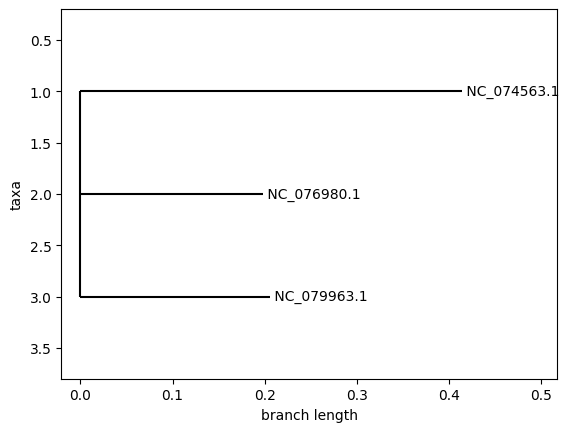

In [ ]:
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.Applications import FastTreeCommandline
import os
import subprocess

def construir_arbol_con_mafft(ruta_alineamiento):
    # Verificar si el archivo de alineamiento existe
    if not os.path.exists(ruta_alineamiento):
        print(f"El archivo {ruta_alineamiento} no existe.")
        return

    archivo_arbol = "arbol_mafft.nwk"

    try:
        # Ejecutar FastTree
        fasttree_cline = FastTreeCommandline(input=ruta_alineamiento, out=archivo_arbol)
        subprocess.run(str(fasttree_cline), shell=True, check=True)

        # Leer y dibujar el árbol
        arbol = Phylo.read(archivo_arbol, "newick")
        Phylo.draw(arbol)
    except Exception as e:
        print(f"Ocurrió un error al construir el árbol: {e}")

# Construcción del árbol
construir_arbol_con_mafft("/content/parte_4_alineado.fasta")
